In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5, 0.5, 0.5))
])

batch_size = 64

# 데이터 가져오기 및 전처리
train_dataset = CIFAR10(root="../data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = CIFAR10(root="../data", download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 170498071/170498071 [00:26<00:00, 6397787.97it/s]


Extracting ../data\cifar-10-python.tar.gz to ../data
Files already downloaded and verified


In [3]:
# CIFAR-10 클래스 이름 정의
cifa_classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [4]:
images, labels = next(iter(test_loader))
images.shape

torch.Size([64, 3, 32, 32])

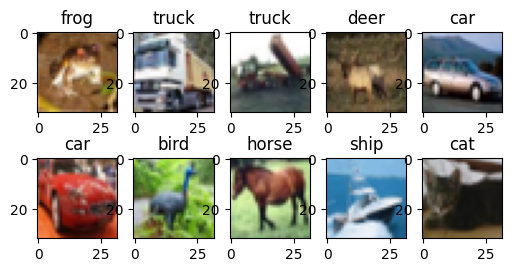

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,3))
for idx in range(10):
    image = images[idx]
    image = image / 2 + 0.5
    image = image.numpy()
    image = np.transpose(image, (1,2,0))
    plt.subplot(2,5, idx + 1)
    plt.imshow(image)
    plt.title(cifa_classes[labels[idx].item()])
plt.show()

In [6]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [7]:
class CNN_Net(nn.Module):
    def __init__(self):
        super(CNN_Net, self).__init__()

        # 첫번째 레이어 만들어보기 - 입력값 : 3개 (RGB) , 출력채널 : 16개, 커널크기 3x3, 패딩1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2,2)

        # 두번째
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)

        # 완전 연결 계층
        self.fc1 = nn.Linear(32 * 8 * 8, 128)

        # 마지막 출력층
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):

        # 첫번째 레이어 연결
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)

        # 두번째
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        # flatten
        x = x.view(-1, 32*8*8)

        # fc 레이어
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)

        return x



In [8]:
device = torch.device("cuda")

In [9]:
model = CNN_Net().to(device)

In [10]:
# 손실함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()

optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [11]:
# 5-4 모델 학습하기
epochs = 10

for epoch in range(epochs):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device) # 데이터를 gpu로 옮기기

        optimizer.zero_grad()
        outputs = model(inputs) # 순전파
        loss = criterion(outputs, labels)
        loss.backward() # 역전파
        optimizer.step() # 파라미터 업데이트
    print(f"Epoch 마다 {epoch}, Loss 값은 : {loss}")

Epoch 마다 0, Loss 값은 : 1.1769251823425293
Epoch 마다 1, Loss 값은 : 0.9570944309234619
Epoch 마다 2, Loss 값은 : 1.165454387664795
Epoch 마다 3, Loss 값은 : 0.7453206777572632
Epoch 마다 4, Loss 값은 : 0.6236568689346313
Epoch 마다 5, Loss 값은 : 0.7988588213920593
Epoch 마다 6, Loss 값은 : 0.5923832654953003
Epoch 마다 7, Loss 값은 : 0.500926673412323
Epoch 마다 8, Loss 값은 : 0.6736454367637634
Epoch 마다 9, Loss 값은 : 0.4970563054084778
